# Correlacion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
count = pd.read_csv('https://bit.ly/31B56KB')
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


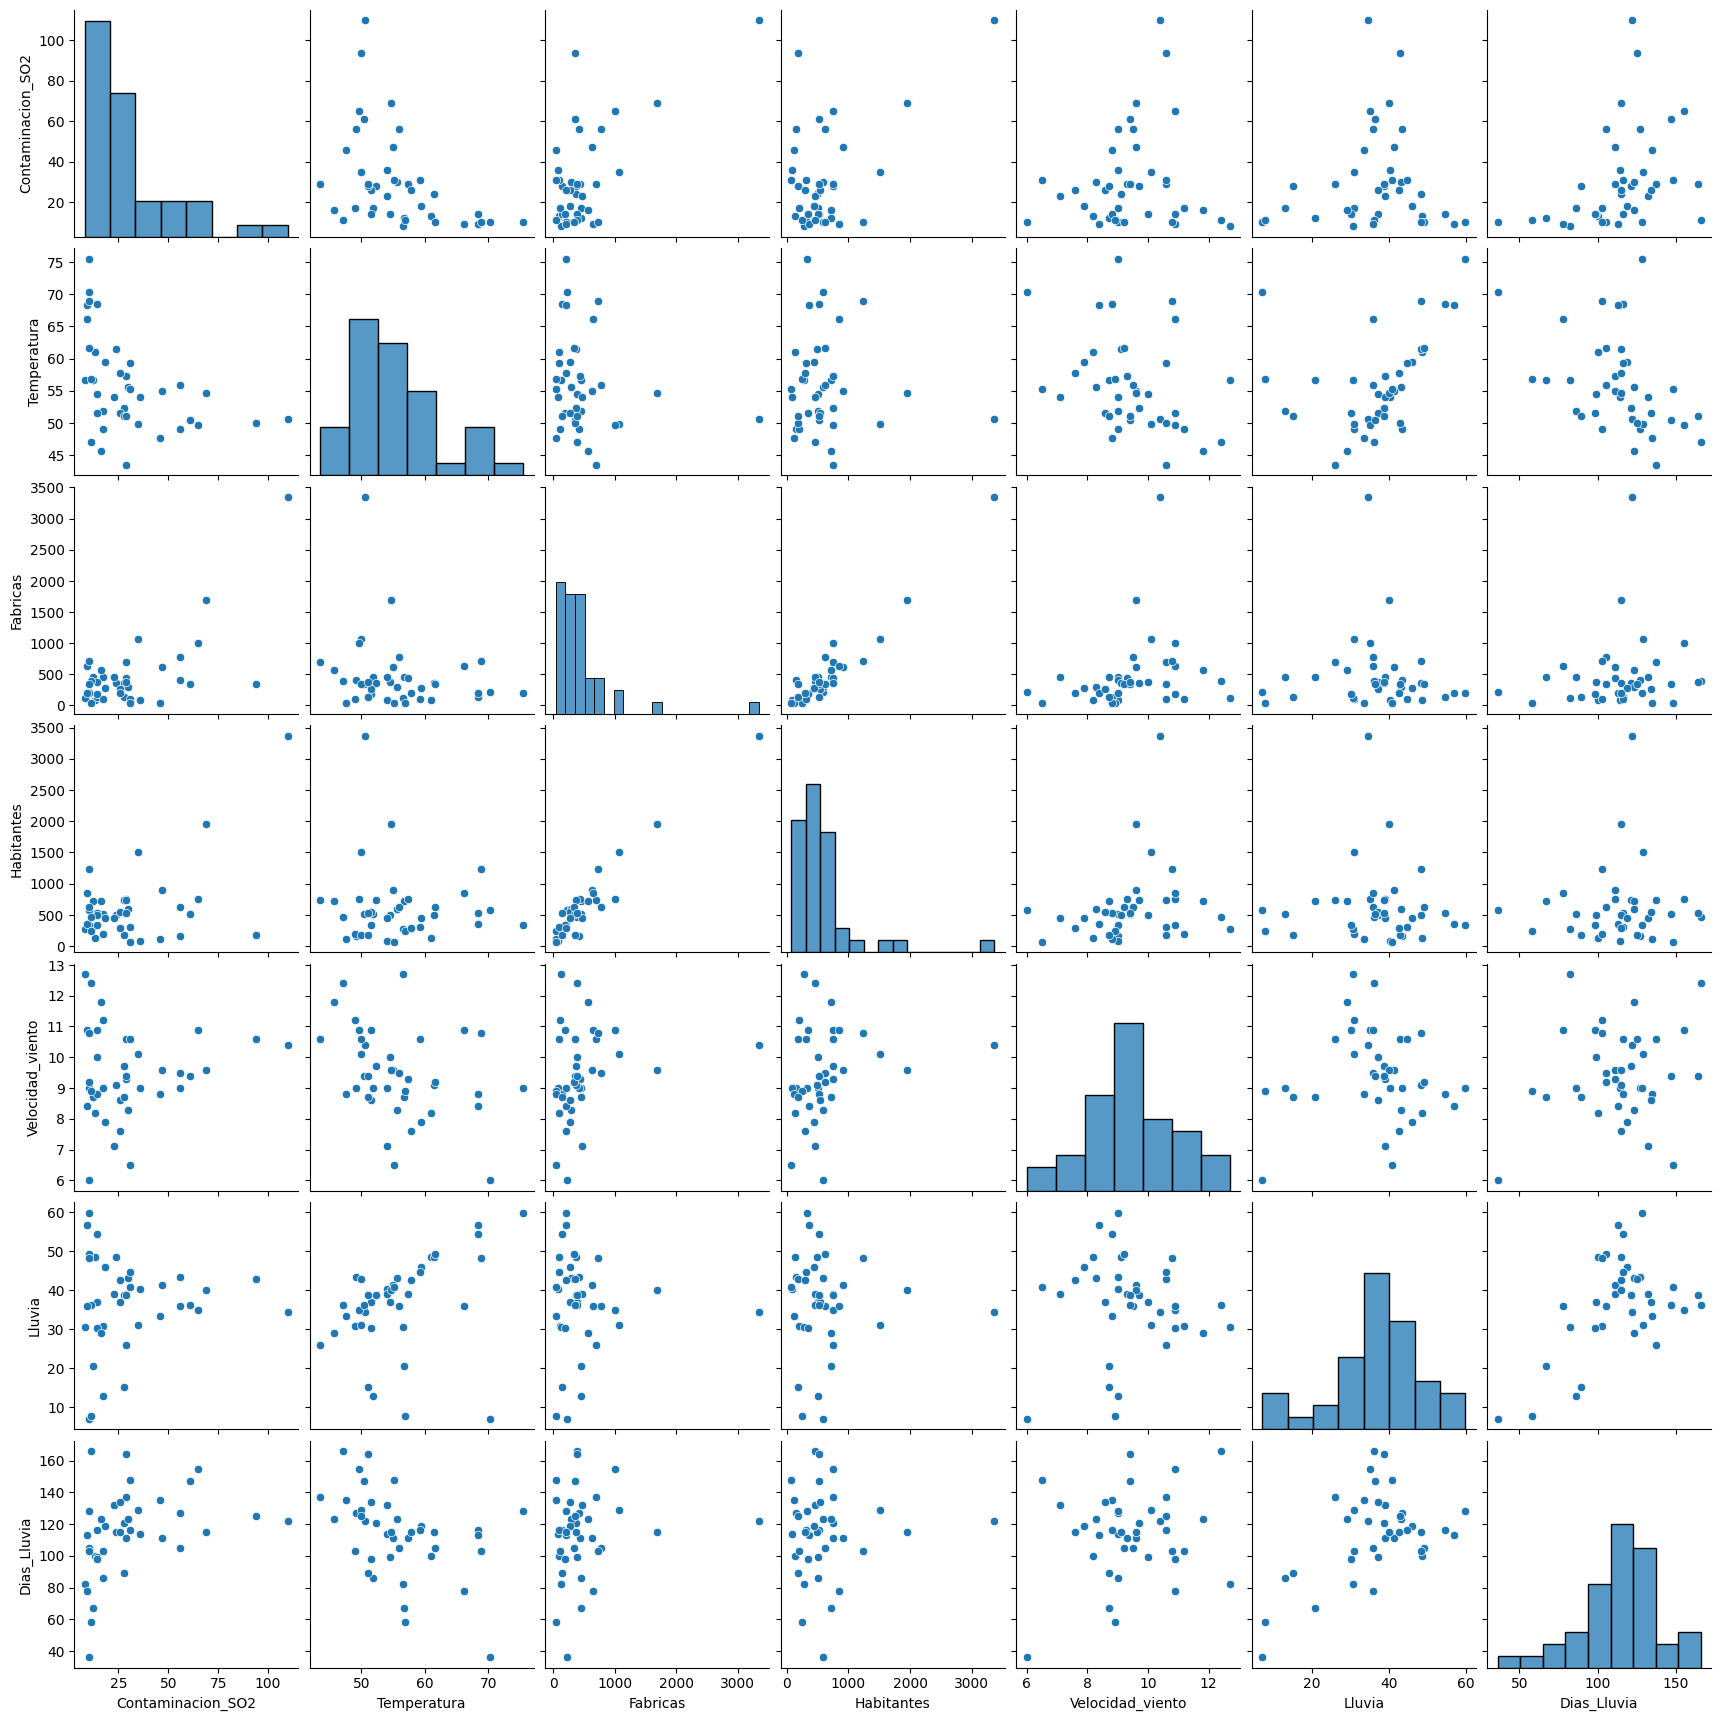

In [4]:
sns.pairplot(count)

In [5]:
count_corr = count.corr(method='spearman')
count_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
Temperatura,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
Fabricas,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
Habitantes,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
Velocidad_viento,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
Lluvia,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
Dias_Lluvia,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


<Axes: >

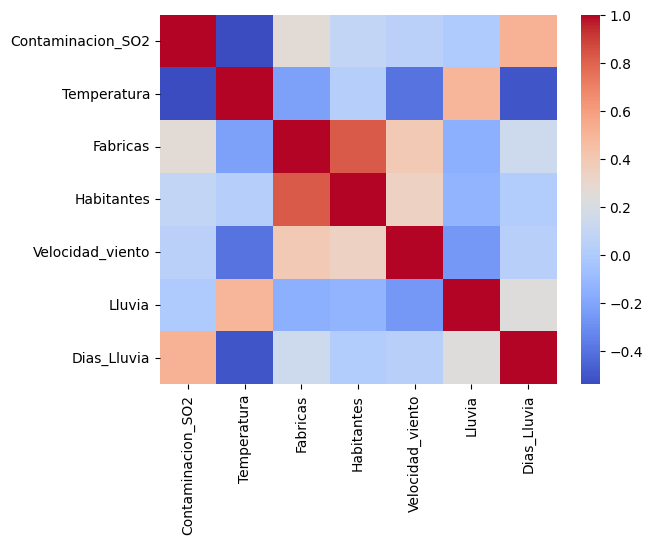

In [6]:
sns.heatmap(count_corr, cmap='coolwarm',xticklabels=count_corr.columns, yticklabels=count_corr.columns)

Revisamos la significancia

In [7]:
import pingouin as pg
corr = pg.pairwise_corr(count, method = 'spearman')
# Ordena los valores de acuerdo a 'p-unc'(significancia)
corr.sort_values(by=['p-unc'])[['X','Y', 'r', 'p-unc']]
# Si p-unc > 0.05 ==> posiblemnete la correlacion se debe al azar

,X,Y,r,p-unc
11,Fabricas,Habitantes,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,-0.505730,7.434618e-04
9,Temperatura,Lluvia,0.498650,9.057623e-04
8,Temperatura,Velocidad_viento,-0.398282,9.906609e-03
12,Fabricas,Velocidad_viento,0.394193,1.076594e-02
15,Habitantes,Velocidad_viento,0.337431,3.096515e-02
1,Contaminacion_SO2,Fabricas,0.264051,9.527256e-02
18,Velocidad_viento,Lluvia,-0.256605,1.053381e-01


# Series de Tiempo

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
ads = pd.read_csv(r"C:\Users\ENRIQUE\Downloads\ads.csv", index_col=['Time'], parse_dates=['Time'])
cur = pd.read_csv(r"C:\Users\ENRIQUE\Downloads\currency.csv", index_col=['Time'], parse_dates=['Time'])
print(ads.head(3))
print(cur.head(3))

                       Ads
Time                      
2017-09-13 00:00:00  80115
2017-09-13 01:00:00  79885
2017-09-13 02:00:00  89325
            GEMS_GEMS_SPENT
Time                       
2017-05-01          1199436
2017-05-02          1045515
2017-05-03           586111


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_27824\2390693437.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cur = pd.read_csv(r"C:\Users\ENRIQUE\Downloads\currency.csv", index_col=['Time'], parse_dates=['Time'])


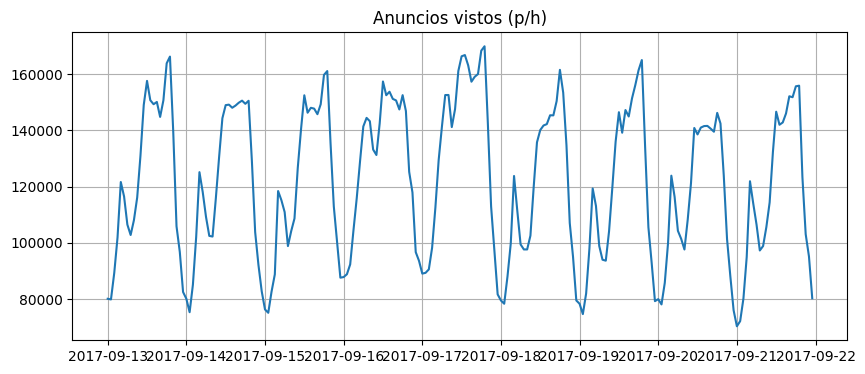

In [10]:
plt.figure(figsize=(10,4))
plt.plot(ads.Ads)
plt.title('Anuncios vistos (p/h)')
plt.grid(True)
plt.show()

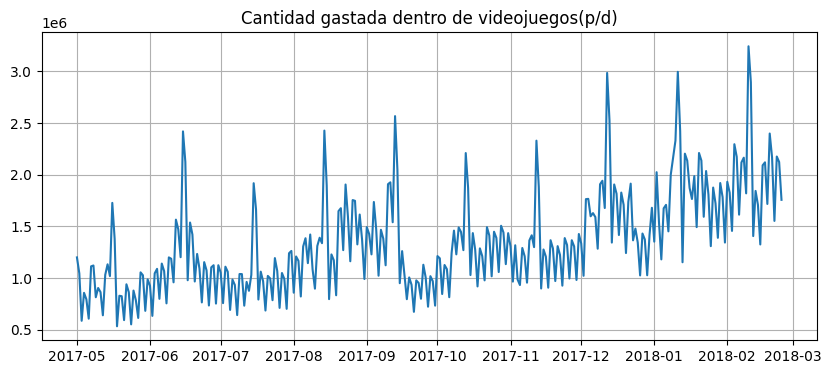

In [11]:
plt.figure(figsize=(10,4))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.title('Cantidad gastada dentro de videojuegos(p/d)')
plt.grid(True)
plt.show()

# AutoCorrelation Function

In [12]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import scipy.stats as scs

data = sm.datasets.sunspots.load_pandas().data
data.tail(3)

,YEAR,SUNACTIVITY
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


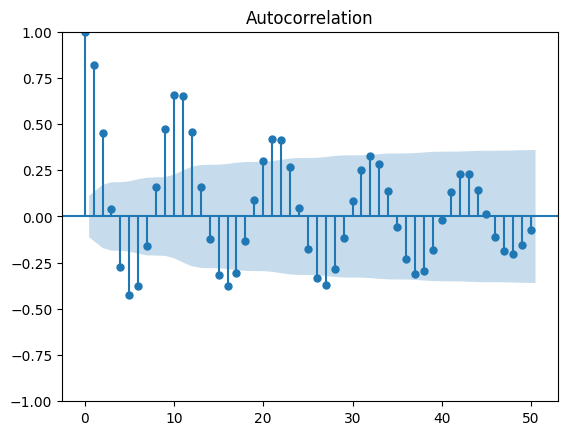

In [13]:
sm.graphics.tsa.plot_acf(data.SUNACTIVITY.values ,lags=50)# lags toma los valores a trabajar
plt.show()

<Axes: >

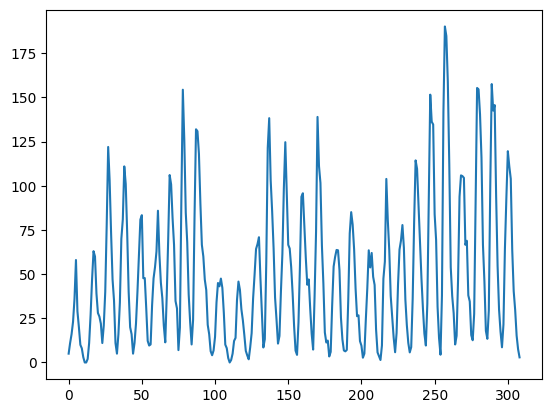

In [14]:
data.SUNACTIVITY.plot()

## ACF(Que tantos pasos tomar)

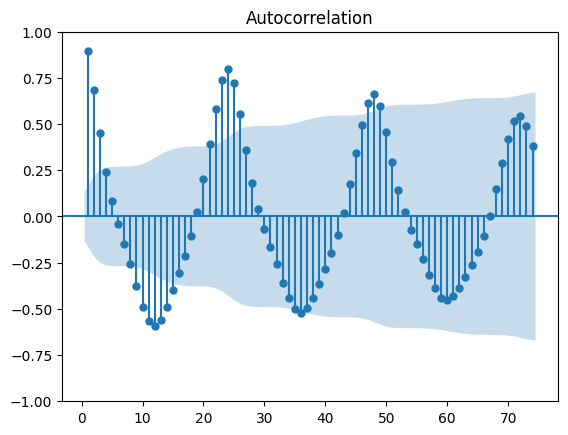

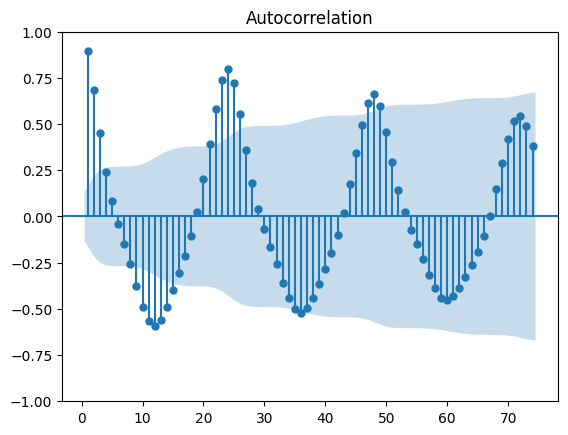

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ads.Ads, lags=range(1,75))

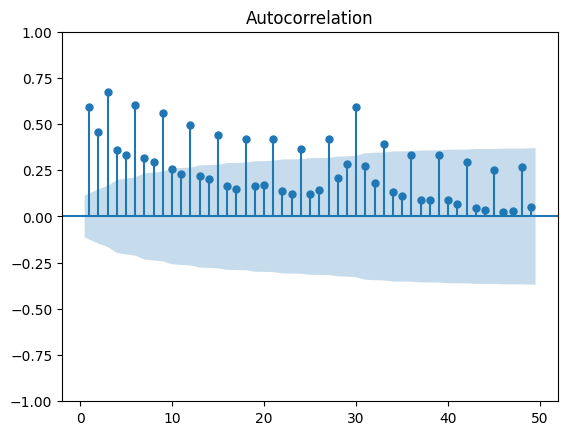

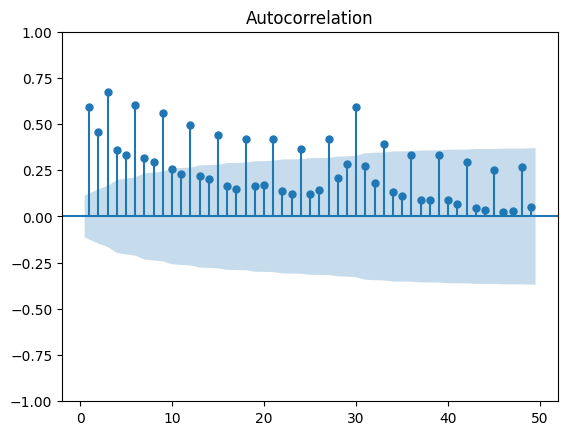

In [16]:
plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,50))

# Media Móvil

In [17]:
def moving_average(series,n):
  """
  n = Tamaño de la ventana

  """
  return np.average(series[-n:])

In [18]:
moving_average(ads.Ads,24)

np.float64(116805.0)

In [19]:
moving_average(cur.GEMS_GEMS_SPENT,30)

np.float64(1931348.8)

In [20]:
#Metricas
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
def plot_moving_average(series, window, scale=1.96,
                        plot_intervals=False, plot_anomalies= False):
  rolling_mean = series.rolling(window=window).mean() #Pandas(ya lo hace)
  plt.figure(figsize=(8,3))
  plt.title('Media movil \n tamaño de la ventana = {}'.format(window))
  plt.plot(rolling_mean, label = 'Tendencia de media movil')
  if plot_intervals:
    mae = mean_absolute_percentage(series[window:], rolling_mean[window:])
    dev = np.std(series[window:] - rolling_mean[window:])
    lower_bond = rolling_mean - (mae + scale * dev)
    upper_bond = rolling_mean + (mae + scale * dev)
    plt.plot(upper_bond, 'r--', label='Intervalo sup/inf')
    plt.plot(lower_bond, 'r--')
    if plot_anomalies:
      anomalies = pd.DataFrame(index=series.index, columns=series.columns)
      anomalies[series<lower_bond] = series[series<lower_bond]
      anomalies[series>upper_bond] = series[series>upper_bond]
      plt.plot(anomalies, 'ro', markersize=10)
  plt.plot(series[window:], label = 'Valores reales')
  plt.legend(loc='upper left')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


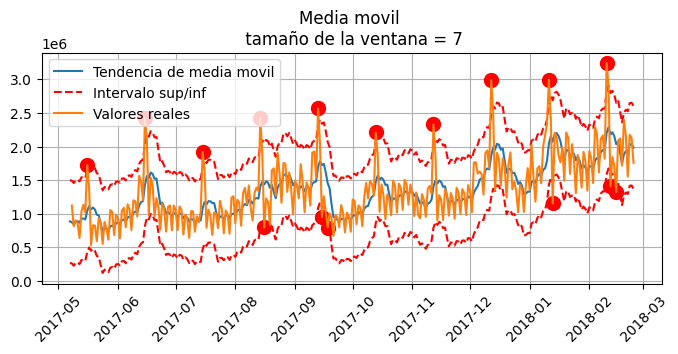

In [22]:
plot_moving_average(cur, 7, plot_intervals=True, plot_anomalies=True)

In [23]:
from sklearn.metrics import silhouette_samples # Que tan lejos esta un grupo del otro , eso nos dice si el grupo es bueno o no

# Media de pesos 

In [24]:
def media_con_pesos(series, weights):
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return result 

In [25]:
print(ads.tail(3))
media_con_pesos(ads, [0.6,0.3, 0.1])

                        Ads
Time                       
2017-09-21 21:00:00  103080
2017-09-21 22:00:00   95155
2017-09-21 23:00:00   80285


Ads    87025.5
Name: 2017-09-21 23:00:00, dtype: float64

# Suavizando exponencial

In [26]:
def exponencial_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1,len(series)):
        result.append(alpha*series[n] + (1-alpha)*result[n-1])
    return result

In [29]:
import seaborn as sns 
def plot_exponential_smoothing(series,alphas):
    plt.figure(figsize=(8,3))
    for alpha in alphas:
        plt.plot(exponencial_smoothing(series.values,alpha), label= 'alpha:{}'.format(alpha))
    plt.plot(series.values, label = 'real')
    plt.legend(loc='best')
    plt.title('Sueavizado exponencial')
    plt.grid(True)

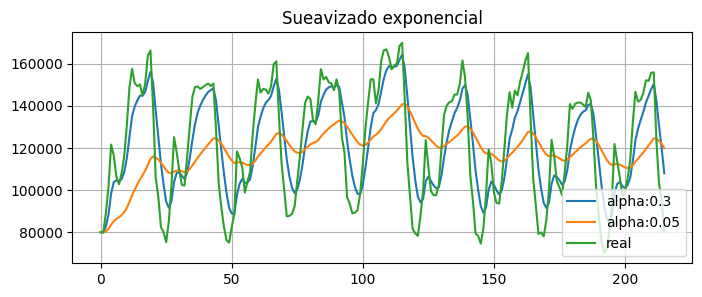

In [30]:
plot_exponential_smoothing(ads.Ads, [0.3,0.05])

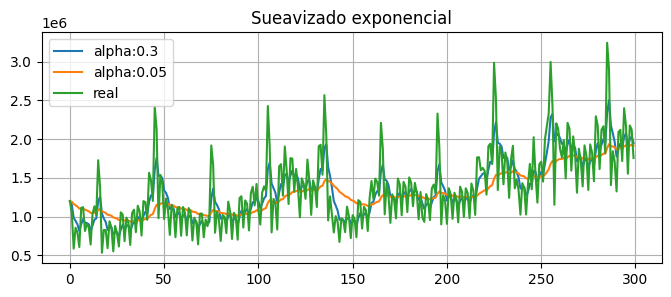

In [31]:
plot_exponential_smoothing(cur.GEMS_GEMS_SPENT, [0.3, 0.05])

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing
def plot_exponential_smoothing(series, alpha):
    ses1 = SimpleExpSmoothing(series).fit(smoothing_level = alpha, optimized = False)
    #Pronostico
    ses2 = ses1.forecast(len(series)/2)
    series.plot(kind='line', figsize=(10,5))
    ses2.plot(kind='line')


c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


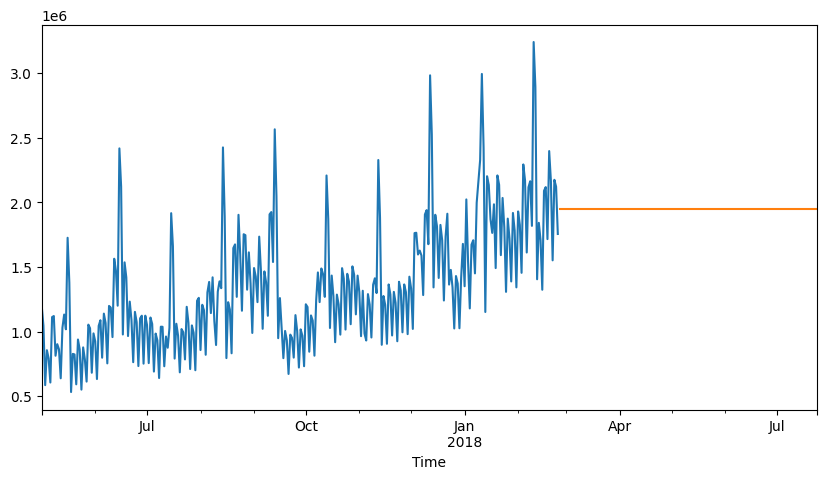

In [33]:
plot_exponential_smoothing(cur.GEMS_GEMS_SPENT, 0.3)

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing # Holt-Winters
def plot_exponential_smoothing(series, alpha):
    ses1 = ExponentialSmoothing(series, seasonal_periods=12,
                                trend='add', seasonal='add').fit()
    #Pronostico
    ses2 = ses1.forecast(len(series)/2)
    series.plot(kind='line', figsize=(10,5))
    ses2.plot(kind='line')

c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


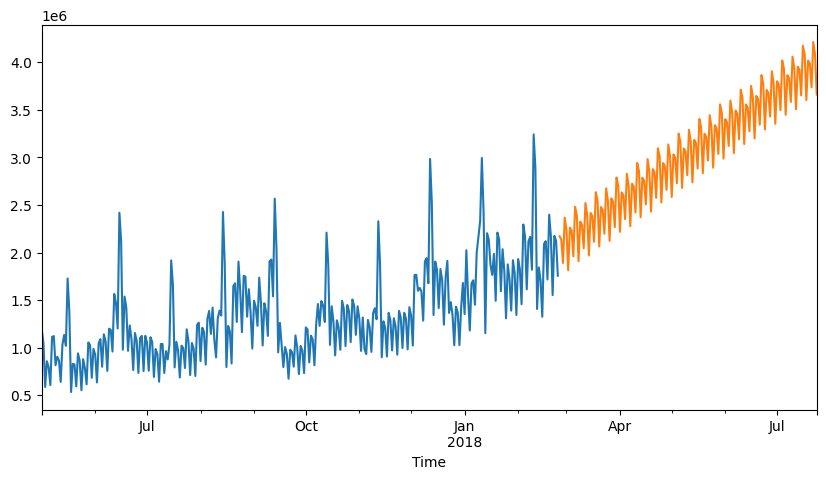

In [35]:
plot_exponential_smoothing(cur.GEMS_GEMS_SPENT, 0.3)

In [40]:
def plot_hw(series, n=20):
    hw = ExponentialSmoothing(series, seasonal_periods=12).fit()
    train, test = series[:-n], series[-n:]
    hw_p = hw.predict(start=test.index[0], end=test.index[-1])
    plt.figure(figsize=(10,5))
    plt.plot(train.index, train, label='train')
    plt.plot(test.index, test, label='test' )
    plt.plot(hw_p.index, hw_p, label = 'hw' )
    plt.legend(loc='best')
    plt.grid(True)

c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


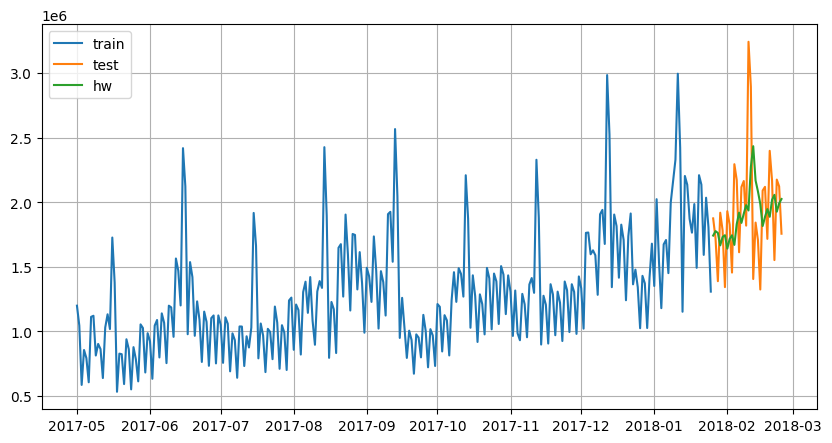

In [41]:
plot_hw(cur.GEMS_GEMS_SPENT, 30)

# Prevision basada en regresion 

In [42]:
data =  pd.DataFrame(ads.Ads.copy())
data.columns = ['y']
data 

,y
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
...,...
2017-09-21 19:00:00,155890
2017-09-21 20:00:00,123395
2017-09-21 21:00:00,103080


In [45]:
#Generar los retrasos de las varibales objetivos 
for i in range(6,25):
    data['lag{}'.format(i)] = data.y.shift(i)

data.head(10)

,y,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
Time,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 05:00:00,116475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 06:00:00,106495,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 07:00:00,102795,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 08:00:00,108055,89325.0,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
tscv = TimeSeriesSplit(n_splits=5)# n_splits hace particiones de entrenamiento y prueba, en este caso en 5 mi conjunto 

In [50]:
def timseries_train_test_split(X,y,test_size):
    test_index = int(len(X) * (1-test_size))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    return X_train, y_train, X_test, y_test

In [51]:
y = data.dropna().y
X =  data.dropna().drop(['y'], axis=1)
X_train, y_train, X_test, y_test = timseries_train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape

((134, 19), (58, 19))

In [52]:
# Regresion Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
def plot_lr_ts(model, X_train, X_test, y_train, y_test):
    prediction = model.predict(X_test)
    plt.figure(figsize=(8,3))
    plt.plot(prediction, 'g', label='prediccion') 
    plt.plot(y_test.values, label='real')
    # ************ plot_intervals
    # ************ plot_anomalies
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title('Error absoluto medio: {0:.3f}'. format(error))
    plt.legend(loc='best')
    plt.grid(True)

def plot_coefs(model): 
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns=['coef']
    coefs['abs'] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by='abs', ascending=False).drop('abs', axis=1)
    plt.figure(figsize=(10,5))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')

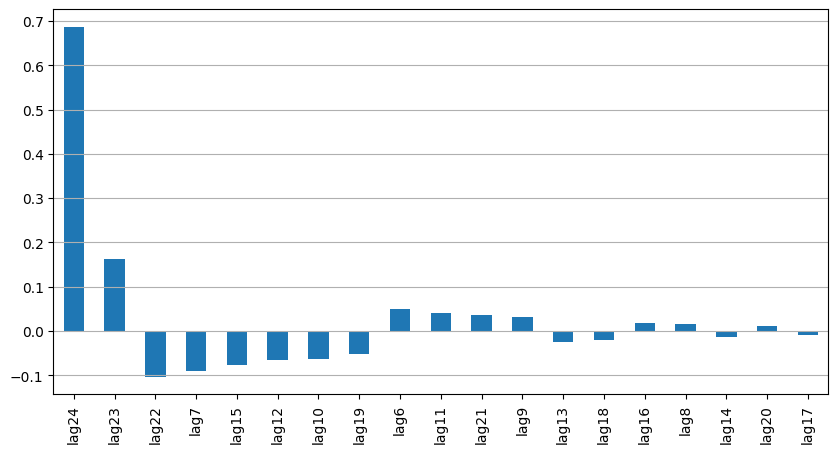

In [63]:
plot_coefs(lr)

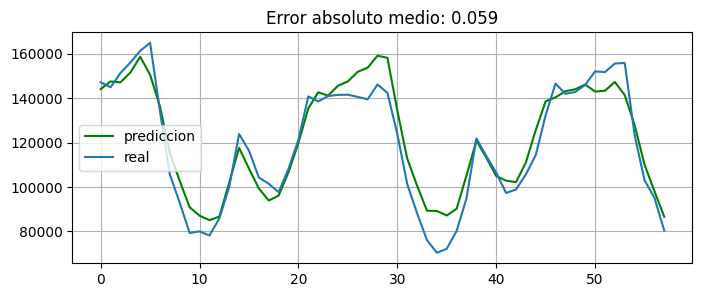

In [58]:
plot_lr_ts(lr, X_train, X_test, y_train, y_test)